In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [5]:
data_dir = '/content/drive/MyDrive/UAS PMDPM 2024/DATASET'
img_size = 180
batch_size = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    label_mode='int',
    validation_split=0.1,
    subset='training',
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    label_mode='int',
    validation_split=0.1,
    subset='validation',
    seed=123
)

class_names = ['Beras Hitam', 'Beras Merah', 'Beras Putih']

Found 269 files belonging to 3 classes.
Using 243 files for training.
Found 269 files belonging to 3 classes.
Using 26 files for validation.


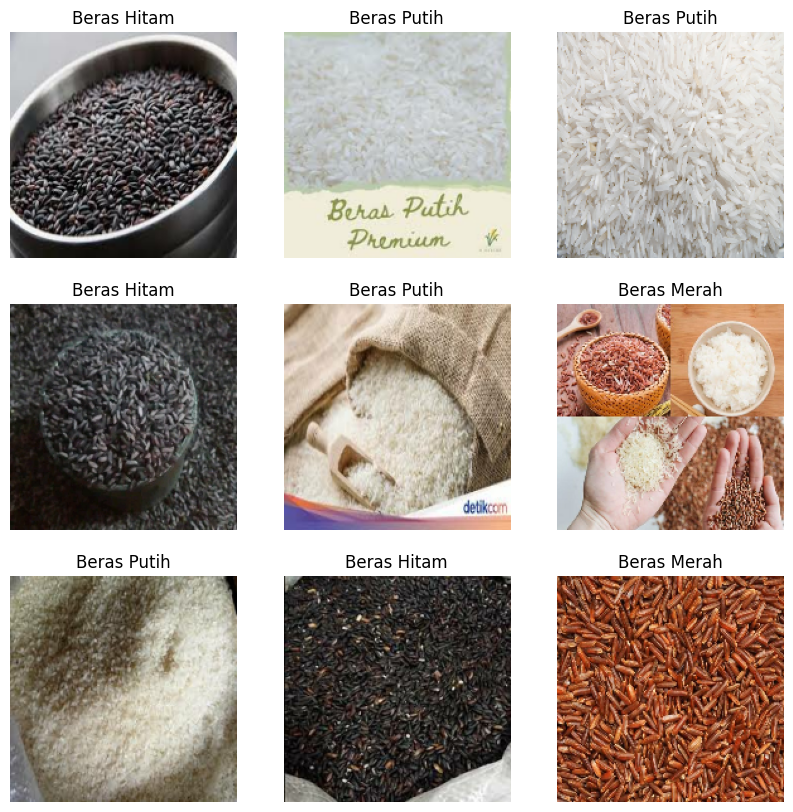

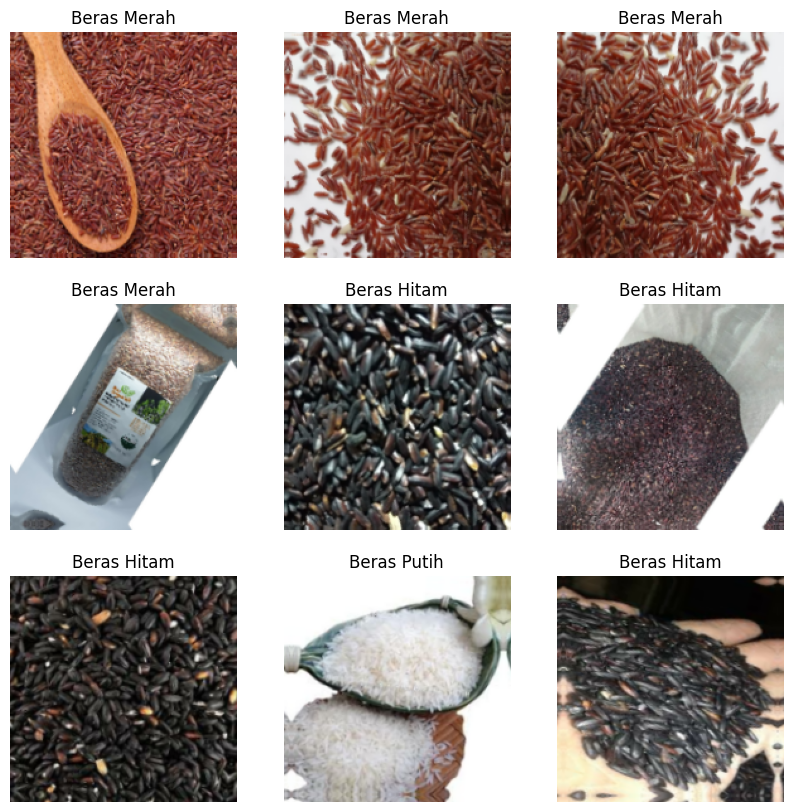

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

plt.figure(figsize=(10, 10))

for images, labels in dataset.take(1):
    augmented_images = data_augmentation(images)

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

In [7]:

def create_vggnet_model(input_shape, n_classes):
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(256, 3, activation='relu', padding='same'),
        layers.Conv2D(256, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(n_classes, activation='softmax')
    ])
    return model

In [8]:

input_shape = (img_size, img_size, 3)
n_classes = 3

model = create_vggnet_model(input_shape, n_classes)
model.summary()

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

history = model.fit(
    dataset,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

epochs_range = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(12, 5))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      52,432,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 78,631,491 (299.96 MB)

 Trainable params: 78,631,491 (299.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 122s 11s/step - accuracy: 0.3306 - loss: 365.3763 - val_accuracy: 0.4231 - val_loss: 1.0832
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 403ms/step - accuracy: 0.3482 - loss: 1.2344 - val_accuracy: 0.4231 - val_loss: 1.0755
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.3420 - loss: 1.1105 - val_accuracy: 0.2692 - val_loss: 1.1023
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.3998 - loss: 1.0905 - val_accuracy: 0.3462 - val_loss: 1.0817
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.3525 - loss: 1.0654 - val_accuracy: 0.3077 - val_loss: 1.0974
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.3341 - loss: 1.8343 - val_accuracy: 0.3077 - val_loss: 1.1351


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
model.save('/content/drive/MyDrive/UAS_PMDPM/vggnet_model.h5')

In [16]:
image_paths = [
    '/content/drive/MyDrive/UAS PMDPM 2024/Test/Hitam/images (42).jpg',
    '/content/drive/MyDrive/UAS PMDPM 2024/Test/Merah/Image_86.jpg',
    '/content/drive/MyDrive/UAS PMDPM 2024/Test/Putih/images (37).jpg'
]

def classify_images(image_path, model, class_names):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_size, img_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    class_idx = np.argmax(score)
    class_name = class_names[class_idx]
    confidence = 100 * np.max(score)
    return f"Prediction: {class_name} with {confidence:.2f}% confidence."

for path in image_paths:
    result = classify_images(path, model, class_names)
    print(f"Image Path: {path}")
    print(result)
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image Path: /content/drive/MyDrive/UAS PMDPM 2024/Test/Hitam/images (42).jpg
Prediction: Beras Hitam with 37.03% confidence.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image Path: /content/drive/MyDrive/UAS PMDPM 2024/Test/Merah/Image_86.jpg
Prediction: Beras Hitam with 37.08% confidence.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image Path: /content/drive/MyDrive/UAS PMDPM 2024/Test/Putih/images (37).jpg
Prediction: Beras Hitam with 36.66% confidence.



Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


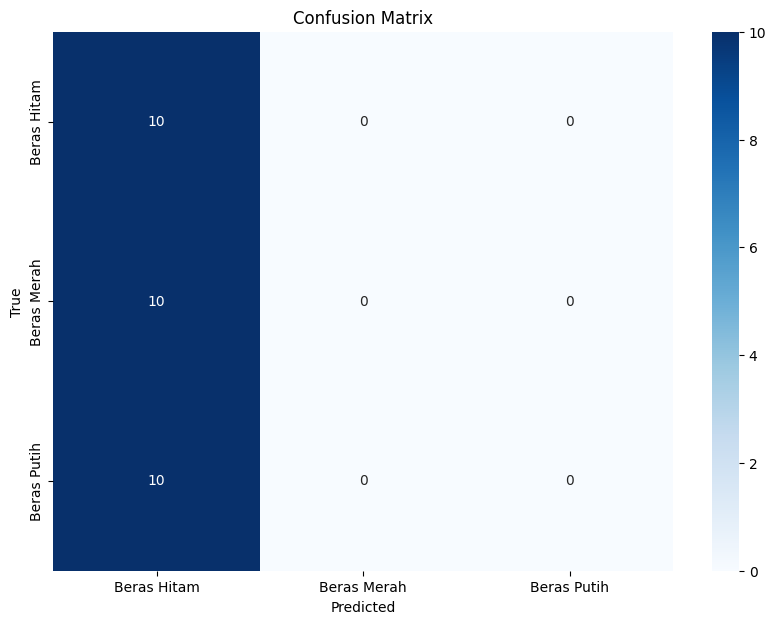

Accuracy: 0.33
Precision: [0.33333333        nan        nan]
Recall: [1. 0. 0.]
F1 Score: [0.5 nan nan]


In [12]:
import seaborn as sns
test_dir = '/content/drive/MyDrive/UAS PMDPM 2024/Test'
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(img_size, img_size),
    shuffle=False
)

y_pred = model.predict(test_data)
y_pred_class = np.argmax(y_pred, axis=1)

true_labels = []
for _, labels in test_data:
    true_labels.extend(np.argmax(labels.numpy(), axis=1))

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy.numpy():.2f}")
print(f"Precision: {precision.numpy()}")
print(f"Recall: {recall.numpy()}")
print(f"F1 Score: {f1_score.numpy()}")
